In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving contohtiktokshop.csv to contohtiktokshop.csv


In [ ]:
df = pd.read_csv('contohtiktokshop.csv')
df.head(10)

,content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,negative
1,sumpah ya aplikasi seller buruk tuh duitnya la...,negative
2,susah ribet,negative
3,capai bikin dekripsi tolak kacau,negative
4,pelanggaran upload barang,negative
5,saldo masuk beda aplikasi shope tokopedia oris...,negative
6,saldo dana berkurangdengan notif transaksi tik...,negative
7,hancur tiktok seller maunya,negative
8,approve pesanan masal tolong diperbaiki secepa...,negative
9,daftar gagal pas daftar ktp notif mencapai bat...,negative


In [ ]:
# Fungsi untuk menghitung jumlah kata dalam sebuah teks
def count_words(text):
    return len(text.split())

# Menghitung total jumlah kata dalam seluruh kolom 'processed_text'
total_word_count = df['content'].apply(count_words).sum()

# Menampilkan hasil
print(f"Total jumlah kata: {total_word_count}")

Total jumlah kata: 22874


In [ ]:
df['sentiment'] = df['sentiment'].replace({'negative': 1, 'positive': 0})

<ipython-input-5-ff3a7011f1ae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'negative': 1, 'positive': 0})


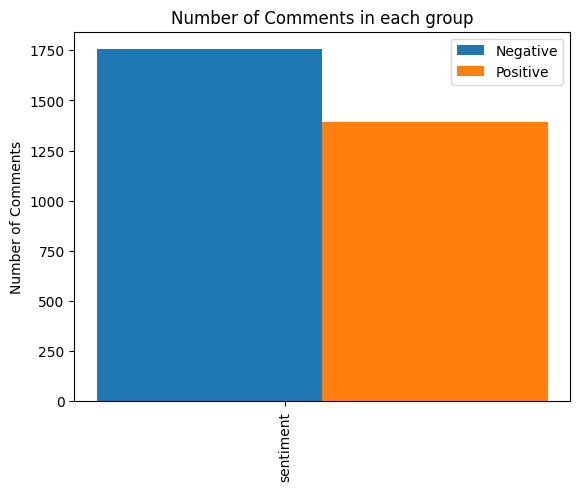

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
factors = ['sentiment']

# Menghitung nilai negatif dan positif
positif = [(df[factor] == 0).sum() for factor in factors]
negatif = [(df[factor] == 1).sum() for factor in factors]

# Menentukan posisi pada sumbu x
x_axis = np.arange(len(factors))
width = 0.25

# Membuat plot
plt.bar(x_axis, negatif, width, label='Negative')
plt.bar(x_axis + width, positif, width, label='Positive')

# Menyesuaikan label pada sumbu x
plt.xticks(x_axis + width / 3, factors, rotation=90)

# Menambah label dan judul
plt.ylabel("Number of Comments")
plt.title("Number of Comments in each group")
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
df.head(10)

,content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,1
1,sumpah ya aplikasi seller buruk tuh duitnya la...,1
2,susah ribet,1
3,capai bikin dekripsi tolak kacau,1
4,pelanggaran upload barang,1
5,saldo masuk beda aplikasi shope tokopedia oris...,1
6,saldo dana berkurangdengan notif transaksi tik...,1
7,hancur tiktok seller maunya,1
8,approve pesanan masal tolong diperbaiki secepa...,1
9,daftar gagal pas daftar ktp notif mencapai bat...,1


In [ ]:
data_bersihh = ' '.join(df['content'])
print(len(data_bersihh))
print(data_bersihh)

167939
tolong keuangan transfer rekening berbeda rekening daftarkan buka toko orang rekening ter isi rekening tolong pendaftaran toko batasi akun daftarkan hilang lupa sandi kasih minim kali sumpah ya aplikasi seller buruk tuh duitnya langsung masuk saldo nunggu berhariãâ butuh modal belanja pakai kecewa aduh payah susah ribet capai bikin dekripsi tolak kacau pelanggaran upload barang saldo masuk beda aplikasi shope tokopedia orisinal saldo dana berkurangdengan notif transaksi tiktoklive nominal rp rp rp rp transaksi apasaya bertransaksi hancur tiktok seller maunya approve pesanan masal tolong diperbaiki secepatnya minggu diperbaiki bugnya daftar gagal pas daftar ktp notif mencapai batas akun didaftarkan ãåâå kasih rating bintang kasih rating bintang platform jlas berlangganan masuk download aplikasi bisapadahal kasih bintang membeli langganan jualansampai susah print masak error ya kali paket print sedikitsedikit pelanggaran anehnya langsung dinonaktifkan ecommerce terburuk ribet apli

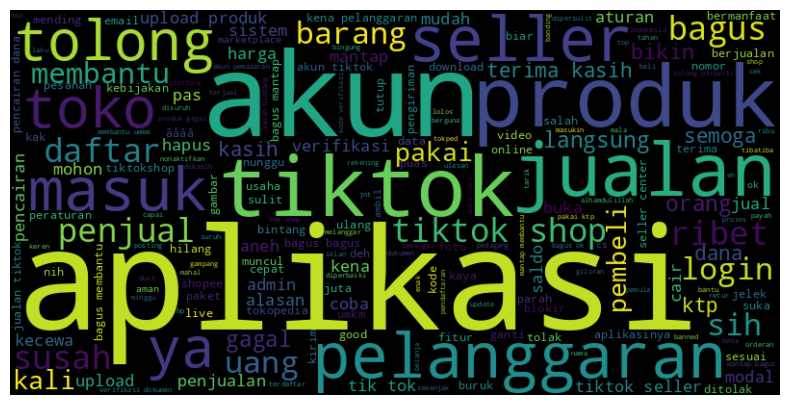

In [ ]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400).generate(data_bersihh)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import random
import nltk
from nltk.corpus import wordnet

In [ ]:
# Mengambil kolom teks yang telah diproses
texts = df['content'].tolist()
label_columns = [col for col in df.columns if col not in ['content']]
labels = df[label_columns].values

In [ ]:
# Preprocessing data
vocab_size = 5000
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_length = 100
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

In [ ]:
# Split data into training and validation sets with stratified split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2)

In [ ]:
len(labels)

3145

In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,369 (1.91 MB)

 Trainable params: 499,857 (1.91 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=16, callbacks=[reduce_lr])

Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.8149 - loss: 1.9168 - val_accuracy: 0.8283 - val_loss: 0.7848 - learning_rate: 0.0010
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9325 - loss: 0.3441 - val_accuracy: 0.8633 - val_loss: 0.4543 - learning_rate: 0.0010
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9681 - loss: 0.1619 - val_accuracy: 0.9285 - val_loss: 0.2364 - learning_rate: 0.0010
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - accuracy: 0.9767 - loss: 0.0978 - val_accuracy: 0.9285 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - accuracy: 0.9794 - loss: 0.0779 - val_accuracy: 0.9269 - val_loss: 0.2592 - learning_rate: 0.0010
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.9813 - loss: 0.0840 - val_accuracy: 0.9157 - val_loss: 0.2817 - learning_rate: 0.0010
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - accuracy: 0.9

In [ ]:
# Evaluasi pada data testing
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9918 - loss: 0.0356
Loss: 0.0284954272210598, Accuracy: 0.9944356083869934


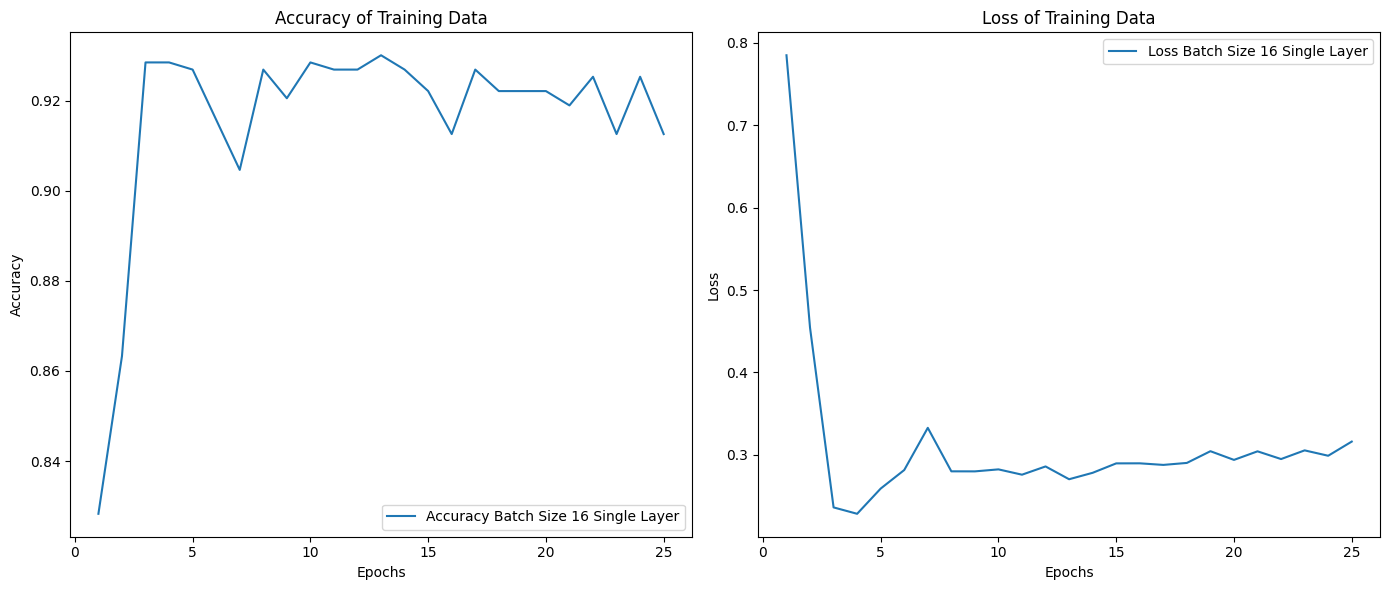

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss for each split
accuracy_70_30 = history.history['val_accuracy']
loss_70_30 = history.history['val_loss']

epochs_70_30 = range(1, len(accuracy_70_30) + 1)

# Plotting the results
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_70_30, accuracy_70_30, label='Accuracy Batch Size 16 Single Layer')
plt.title('Accuracy of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_70_30, loss_70_30, label='Loss Batch Size 16 Single Layer')
plt.title('Loss of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import numpy as np

# Melakukan prediksi
y_pred = model.predict(X_val)

# Konversi dari one-hot encoding ke label biner (multilabel)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = y_val

# The target names should reflect the binary nature of the problem
# Assuming 0 represents negative sentiment and 1 represents positive sentiment
target_names = ['negative', 'positive'] # Manually defining target names for binary classes

# Evaluasi dengan classification report
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion Matrix untuk setiap label
mcm = multilabel_confusion_matrix(y_true, y_pred_classes)
for i, cm in enumerate(mcm):
    print(f"Confusion matrix for {target_names[i]}:")
    print(cm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
              precision    recall  f1-score   support

    negative       0.93      0.86      0.90       274
    positive       0.90      0.95      0.92       355

    accuracy                           0.91       629
   macro avg       0.92      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629

Confusion matrix for negative:
[[338  17]
 [ 38 236]]
Confusion matrix for positive:
[[236  38]
 [ 17 338]]


In [ ]:
!pip install wordcloud matplotlib


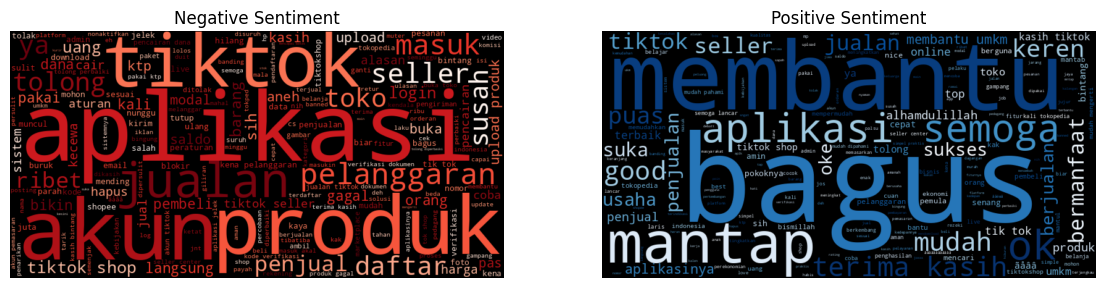

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text based on sentiment
negative_text = ' '.join(df[df['sentiment'] == 1]['content'])
positive_text = ' '.join(df[df['sentiment'] == 0]['content'])

# Create a word cloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Create a word cloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(positive_text)

# Plot the word clouds
plt.figure(figsize=(14, 6))

# Negative sentiment word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

# Positive sentiment word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.show()


In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_val , y_val)
print(f"Akurasi pada data uji: {accuracy:.2f}")

# Fungsi untuk memprediksi sentimen
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')
    prediction = model.predict(text_pad)[0][0]
    print(f"Probabilitas prediksi: {prediction}")  # Melihat probabilitas
    return "Negative" if prediction > 0.5 else "Positive"


# Contoh penggunaan fungsi
sample_text = "aplikasi ini sangat tidak bagus dan tidak bermanfaat"
print(f"Teks: '{sample_text}' -> Sentimen: {predict_sentiment(sample_text)}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9195 - loss: 0.2913
Akurasi pada data uji: 0.91
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Probabilitas prediksi: 0.9829497933387756
Teks: 'aplikasi ini sangat tidak bagus dan tidak bermanfaat' -> Sentimen: Negative
